In [169]:
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [116]:
# Load flight data from csv file.
flights = pd.read_csv("OTR_JAN2018.csv")

In [117]:
flights.head()

,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,1/27/2018,UA,369,11697,FLL,"Fort Lauderdale, FL",FL,12266,IAH,...,0,173,174.0,148.0,966,NaN,NaN,NaN,NaN,NaN
1,1,1/27/2018,UA,368,14747,SEA,"Seattle, WA",WA,14771,SFO,...,0,133,119.0,98.0,679,NaN,NaN,NaN,NaN,NaN
2,1,1/27/2018,UA,367,11278,DCA,"Washington, DC",VA,12266,IAH,...,0,217,220.0,190.0,1208,NaN,NaN,NaN,NaN,NaN
3,1,1/27/2018,UA,366,12892,LAX,"Los Angeles, CA",CA,13930,ORD,...,0,240,241.0,212.0,1744,NaN,NaN,NaN,NaN,NaN
4,1,1/27/2018,UA,365,12451,JAX,"Jacksonville, FL",FL,11618,EWR,...,0,141,131.0,112.0,820,NaN,NaN,NaN,NaN,NaN


In [118]:
# check top 20 delayed flights

top_20 = flights.sort_values(by='ARR_DELAY', ascending=False)[:20]
top_20[['FL_DATE','OP_UNIQUE_CARRIER','ARR_DELAY','ORIGIN_CITY_NAME','DEST_CITY_NAME','CARRIER_DELAY', 'WEATHER_DELAY']]

,FL_DATE,OP_UNIQUE_CARRIER,ARR_DELAY,ORIGIN_CITY_NAME,DEST_CITY_NAME,CARRIER_DELAY,WEATHER_DELAY
472366,1/11/2018,AA,2023.0,"Eagle, CO","New York, NY",2007.0,0.0
483314,1/2/2018,AA,1778.0,"Norfolk, VA","Dallas/Fort Worth, TX",1752.0,0.0
141684,1/3/2018,HA,1717.0,"Honolulu, HI","New York, NY",35.0,1682.0
498049,1/3/2018,AA,1648.0,"Salt Lake City, UT","Dallas/Fort Worth, TX",0.0,0.0
468392,1/9/2018,AA,1537.0,"Kona, HI","Los Angeles, CA",1531.0,0.0
479862,1/9/2018,AA,1515.0,"Washington, DC","Dallas/Fort Worth, TX",1515.0,0.0
485341,1/11/2018,AA,1510.0,"Dayton, OH","Dallas/Fort Worth, TX",1510.0,0.0
389147,1/4/2018,YV,1486.0,"Fresno, CA","Phoenix, AZ",1469.0,0.0
83493,1/6/2018,B6,1473.0,"Aguadilla, PR","New York, NY",1125.0,0.0
104363,1/8/2018,EV,1454.0,"Roswell, NM","Dallas/Fort Worth, TX",1454.0,0.0


### Most delayed flight

The most delayed flight was almost 2000 minutes delayed, almost a day

In [119]:
# add a column DELAYED to have boolen values if a flight was delayed or not using lambda for ARR_DELAY > 0

flights['DELAYED'] = flights['ARR_DELAY'].apply(lambda x: x > 0)

In [120]:
flights.head()

,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAYED
0,1,1/27/2018,UA,369,11697,FLL,"Fort Lauderdale, FL",FL,12266,IAH,...,173,174.0,148.0,966,NaN,NaN,NaN,NaN,NaN,False
1,1,1/27/2018,UA,368,14747,SEA,"Seattle, WA",WA,14771,SFO,...,133,119.0,98.0,679,NaN,NaN,NaN,NaN,NaN,False
2,1,1/27/2018,UA,367,11278,DCA,"Washington, DC",VA,12266,IAH,...,217,220.0,190.0,1208,NaN,NaN,NaN,NaN,NaN,True
3,1,1/27/2018,UA,366,12892,LAX,"Los Angeles, CA",CA,13930,ORD,...,240,241.0,212.0,1744,NaN,NaN,NaN,NaN,NaN,False
4,1,1/27/2018,UA,365,12451,JAX,"Jacksonville, FL",FL,11618,EWR,...,141,131.0,112.0,820,NaN,NaN,NaN,NaN,NaN,False


In [121]:
# now check the percentage of flights delayed in Jan 2018

not_delayed = flights['DELAYED'].value_counts()[0] # first value of the result above
delayed = flights['DELAYED'].value_counts()[1] # second value of the result above
total_flights = not_delayed + delayed # total count of flights
float(delayed) / total_flights

0.3147348443655524

Almost 31 % of the flights were delayed in Jan 2018 , which is a bad season for flights due to winter storms.

In [122]:
# now chec how many were cancelledm using cancled column id dataframe with values 0 and 1

not_canceled, canceled = flights['CANCELLED'].value_counts()
float(canceled) / len(flights)

0.03011481833585328

Around 3 % of flights were cancelled

### Plot some data using our DELAYED column

In [123]:
# get boolean values of dleayed grouped with Airline Ids
group_by_carrier = flights.groupby(['OP_UNIQUE_CARRIER','DELAYED'])

group_by_carrier


In [124]:
# now unstack it to create new columns
count_delays_by_carrier = group_by_carrier.size().unstack()
count_delays_by_carrier

DELAYED,False,True
OP_UNIQUE_CARRIER,,
9E,13376,4858
AA,50840,22758
AS,11506,3806
B6,14497,10374
DL,54052,17202
EV,13764,6402
F9,6111,3596
G4,4353,2461
HA,4274,2353


Text(0.5, 1.0, 'Airlines Delay')

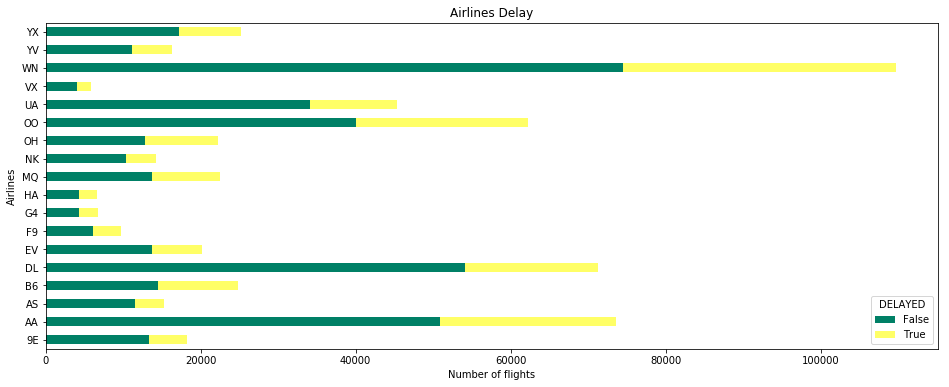

In [151]:
# plot the data in bar chart 
count_delays_by_carrier.plot(kind='barh', stacked=True, figsize=[16,6], colormap='summer')
plt.ylabel('Airlines')
plt.xlabel('Number of flights')
plt.title('Airlines Delay')

In [164]:
delays_list = ['CARRIER_DELAY','WEATHER_DELAY','LATE_AIRCRAFT_DELAY','NAS_DELAY','SECURITY_DELAY'] # columns list
flight_delays_by_day = flights.pivot_table(index='FL_DATE', values=delays_list, aggfunc='sum') # Aggregate number of rows as values

Now lets try to find the reason of delays of flights and plot it day wise to see the variations.

Text(0.5, 1.0, 'Avg Delay each day of January 2018 - Stacked delay type')

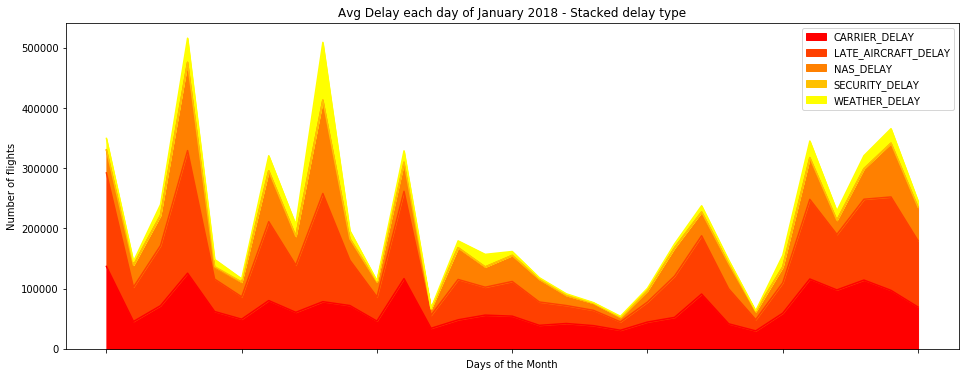

In [166]:
flight_delays_by_day.plot(kind='area', figsize=[16,6], stacked=True, colormap='autumn') # area plot
plt.xlabel('Days of the Month')
plt.ylabel('Number of flights')
plt.title('Avg Delay each day of January 2018 - Stacked delay type')

In [ ]:

tidy_flight_delays_by_day = pd.melt(pew_df,id_vars=['religion'], value_vars=['<$10k','$10-20k','$20-30k','$30-40k','$40-50k','$50-75k','$75-100k','$100-150k','>150k','Don\'t know/refused']
                     ,var_name='income', value_name='frequency')
tidy_flight_delays_by_day.mark_bar().encode(
    x='FL_DATE',
    y='frequency',
    color='religion'
)

we can clearly see that the main reasons for delay are Carrier delay and Late Aircraft delay.

Now lets use the delays by carried DF to do some more analysis

In [128]:
# reset the index
delayed_by_carrier = flights.groupby(['OP_UNIQUE_CARRIER','DELAYED']).size().unstack().reset_index()
delayed_by_carrier[:10]

DELAYED,OP_UNIQUE_CARRIER,False,True
0,9E,13376,4858
1,AA,50840,22758
2,AS,11506,3806
3,B6,14497,10374
4,DL,54052,17202
5,EV,13764,6402
6,F9,6111,3596
7,G4,4353,2461
8,HA,4274,2353
9,MQ,13732,8770


In [129]:
# Create a new column for total flights
delayed_by_carrier['FLIGHTS_COUNT'] = (delayed_by_carrier[False] + delayed_by_carrier[True])
delayed_by_carrier[:10]

DELAYED,OP_UNIQUE_CARRIER,False,True,FLIGHTS_COUNT
0,9E,13376,4858,18234
1,AA,50840,22758,73598
2,AS,11506,3806,15312
3,B6,14497,10374,24871
4,DL,54052,17202,71254
5,EV,13764,6402,20166
6,F9,6111,3596,9707
7,G4,4353,2461,6814
8,HA,4274,2353,6627
9,MQ,13732,8770,22502


In [130]:
# create a proportion coloumn
delayed_by_carrier['PROPORTION_DELAYED'] = delayed_by_carrier[True] / delayed_by_carrier['FLIGHTS_COUNT']
delayed_by_carrier[:100]

DELAYED,OP_UNIQUE_CARRIER,False,True,FLIGHTS_COUNT,PROPORTION_DELAYED
0,9E,13376,4858,18234,0.266425
1,AA,50840,22758,73598,0.309220
2,AS,11506,3806,15312,0.248563
3,B6,14497,10374,24871,0.417112
4,DL,54052,17202,71254,0.241418
5,EV,13764,6402,20166,0.317465
6,F9,6111,3596,9707,0.370454
7,G4,4353,2461,6814,0.361168
8,HA,4274,2353,6627,0.355063
9,MQ,13732,8770,22502,0.389743


In [131]:
# check the most delayed flights
delayed_by_carrier.sort_values('PROPORTION_DELAYED', ascending=False)

DELAYED,OP_UNIQUE_CARRIER,False,True,FLIGHTS_COUNT,PROPORTION_DELAYED
11,OH,12843,9367,22210,0.421747
3,B6,14497,10374,24871,0.417112
9,MQ,13732,8770,22502,0.389743
6,F9,6111,3596,9707,0.370454
7,G4,4353,2461,6814,0.361168
12,OO,40027,22167,62194,0.356417
8,HA,4274,2353,6627,0.355063
15,WN,74503,35173,109676,0.320699
16,YV,11141,5212,16353,0.318718
5,EV,13764,6402,20166,0.317465


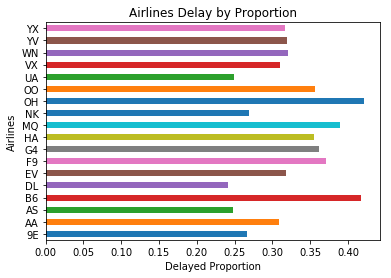

In [156]:
ax = delayed_by_carrier.plot(x='OP_UNIQUE_CARRIER', y='PROPORTION_DELAYED', kind = 'barh')
plt.ylabel('Airlines')
plt.xlabel('Delayed Proportion')
plt.title('Airlines Delay by Proportion')
ax.legend().set_visible(False)

Clearly the ones that looked like had more delays are actually better when compared with proportions. Like Southwest and delta.

Lets pick southwest for some detailed analysis, as its my most preferred airline.

In [133]:
southwest = flights[flights['OP_UNIQUE_CARRIER'] == 'WN']['ARR_DELAY']
southwest.describe()

count    107023.000000
mean          0.282154
std          27.337047
min         -73.000000
25%         -14.000000
50%          -6.000000
75%           6.000000
max         550.000000
Name: ARR_DELAY, dtype: float64

Avg delay is just 0.28 minutes, while longest was 550 minutes.
Lets check its distribution using histogram.
Since some delays are in negative we need to some adjustements for bin sizes and values.
From above we cans ee that most of the data should be captured between -50 and 100 minutes delaym, so we use that for bun values.

Text(0.5, 1.0, 'Southwest Delay Distribution')

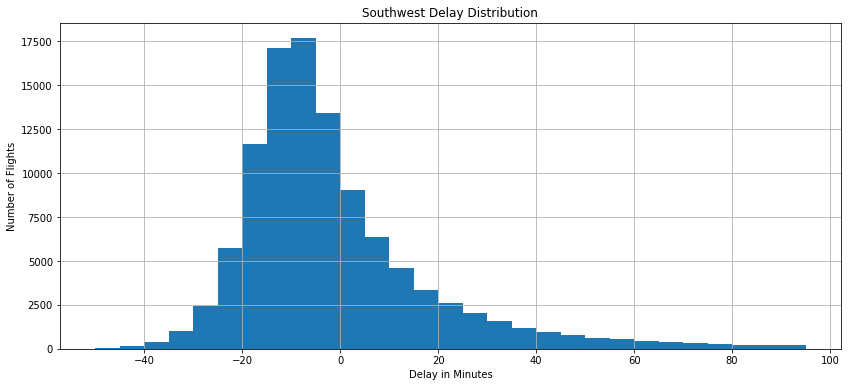

In [157]:
bin_values = np.arange(start=-50, stop=100, step=5)
southwest.hist(bins=bin_values, figsize=[14,6])
plt.xlabel('Delay in Minutes')
plt.ylabel('Number of Flights')
plt.title('Southwest Delay Distribution')

Looks like southwest is mostly before time or on time even during January's stormy winters.

Now lets compare two airlines with almost similar number of total flights.
Lets take US Airways Express 'OH' and Republic Airways 'YX'

Text(0.5, 1.0, 'Compare Delay Distribution of US Airways Express and Republic Airways')

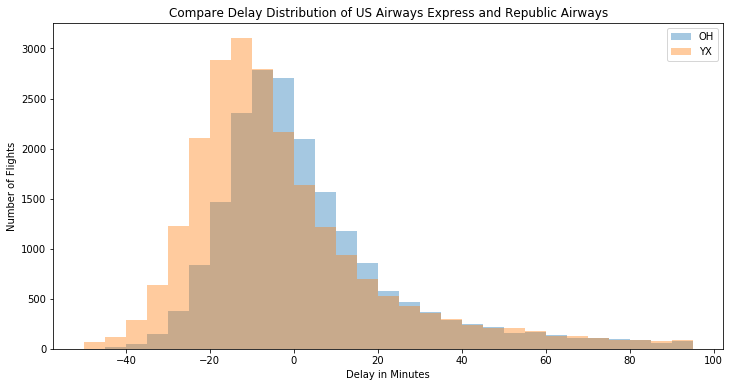

In [158]:
OH_YX_airlines_index = flights['OP_UNIQUE_CARRIER'].isin(['OH','YX']) # create index of flights from those airlines
OH_YX_airlines = flights[OH_YX_airlines_index] # select rows
group_carriers = OH_YX_airlines.groupby('OP_UNIQUE_CARRIER')['ARR_DELAY'] # group values by carrier, select minutes delayed
group_carriers.plot(kind='hist', bins=bin_values, figsize=[12,6], alpha=.4, legend=True) # alpha for transparency
plt.xlabel('Delay in Minutes')
plt.ylabel('Number of Flights')
plt.title('Compare Delay Distribution of US Airways Express and Republic Airways')

The darker area is where the distribution overlaps. The distribution lookssimilar but they are not the same as OH has more shifting to the left showing more delays as its evident from the earlier analysis as well.

Now lets look the busiest 20 airports and analyze where not go for vacation in January (Based on delays etc)

In [136]:
busiest_10 = flights['ORIGIN'].value_counts()[:10]
busiest_10

ATL    30617
ORD    25680
DFW    22349
CLT    18362
DEN    18231
LAX    17785
PHX    14435
SFO    14135
IAH    14058
LGA    13587
Name: ORIGIN, dtype: int64

Get these airports in a list to fliter out our data for them.

In [137]:
busiest_10_airports_names = busiest_10.index.tolist()
busiest_10_airports_names

['ATL', 'ORD', 'DFW', 'CLT', 'DEN', 'LAX', 'PHX', 'SFO', 'IAH', 'LGA']

In [138]:
busiest_10_airports = flights[flights['ORIGIN'].isin(busiest_10_airports_names)]
busiest_10_airports

,MONTH,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_AIRPORT_ID,DEST,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAYED
3,1,1/27/2018,UA,366,12892,LAX,"Los Angeles, CA",CA,13930,ORD,...,240,241.0,212.0,1744,NaN,NaN,NaN,NaN,NaN,False
5,1,1/27/2018,UA,364,12266,IAH,"Houston, TX",TX,14107,PHX,...,178,166.0,142.0,1009,NaN,NaN,NaN,NaN,NaN,False
10,1,1/27/2018,UA,360,12892,LAX,"Los Angeles, CA",CA,12264,IAD,...,292,284.0,256.0,2288,NaN,NaN,NaN,NaN,NaN,False
11,1,1/27/2018,UA,358,14771,SFO,"San Francisco, CA",CA,12889,LAS,...,99,95.0,62.0,414,NaN,NaN,NaN,NaN,NaN,False
14,1,1/27/2018,UA,354,11292,DEN,"Denver, CO",CO,11042,CLE,...,167,143.0,128.0,1201,NaN,NaN,NaN,NaN,NaN,False
21,1,1/27/2018,UA,347,11292,DEN,"Denver, CO",CO,12953,LGA,...,224,191.0,176.0,1620,NaN,NaN,NaN,NaN,NaN,False
27,1,1/27/2018,UA,341,12266,IAH,"Houston, TX",TX,12953,LGA,...,211,183.0,157.0,1416,NaN,NaN,NaN,NaN,NaN,False
31,1,1/27/2018,UA,339,11292,DEN,"Denver, CO",CO,14747,SEA,...,181,176.0,159.0,1024,NaN,NaN,NaN,NaN,NaN,False
32,1,1/27/2018,UA,338,11292,DEN,"Denver, CO",CO,14262,PSP,...,138,122.0,106.0,776,NaN,NaN,NaN,NaN,NaN,False
34,1,1/27/2018,UA,336,11292,DEN,"Denver, CO",CO,13930,ORD,...,146,121.0,110.0,888,NaN,NaN,NaN,NaN,NaN,False


Aggregate in a pibot table based on total arrival delays by date as index.

In [139]:
busiest_10_airports_pivots = busiest_10_airports.pivot_table(index='FL_DATE', columns='ORIGIN', values='ARR_DELAY')
busiest_10_airports_pivots

ORIGIN,ATL,CLT,DEN,DFW,IAH,LAX,LGA,ORD,PHX,SFO
FL_DATE,,,,,,,,,,
1/1/2018,15.714640,15.237676,8.780096,28.321986,0.111359,5.267559,12.197452,27.478803,4.350731,3.218684
1/10/2018,-7.678016,-3.945338,-3.616984,-0.210894,-10.258134,0.274648,-7.066667,6.608273,8.372340,10.813901
1/11/2018,4.047170,3.731079,2.840871,8.487699,46.013453,-2.610544,-11.592157,5.100236,7.010526,3.627706
1/12/2018,29.566127,22.049488,9.768067,9.103495,12.407328,13.334454,44.747549,35.359223,8.697479,35.321814
1/13/2018,-3.346741,4.034351,-6.390533,-1.893309,-2.026393,-6.458874,1.728070,2.309859,3.073986,-3.592287
1/14/2018,-7.457524,-3.009346,-4.779006,-2.513081,-8.847619,-6.949343,-17.286624,13.800256,-1.775229,-1.746305
1/15/2018,-1.686013,3.257658,30.574290,4.205318,-8.513333,-3.069610,10.139676,58.627820,5.485294,-3.785249
1/16/2018,4.710615,-1.481273,2.512456,0.522621,106.095238,-0.794171,1.548523,13.617391,6.707022,-0.800895
1/17/2018,138.568685,122.127273,2.215278,5.898256,64.324607,4.868794,39.819444,4.550122,13.847312,1.314480


Now we compare the airports by laying this data in plot and box lots.

Lets boxplot to see the variations in day to day delays on these airports in January.

Text(0.5, 1.0, 'Top 10 busiest Airports - Delays Boxplot')

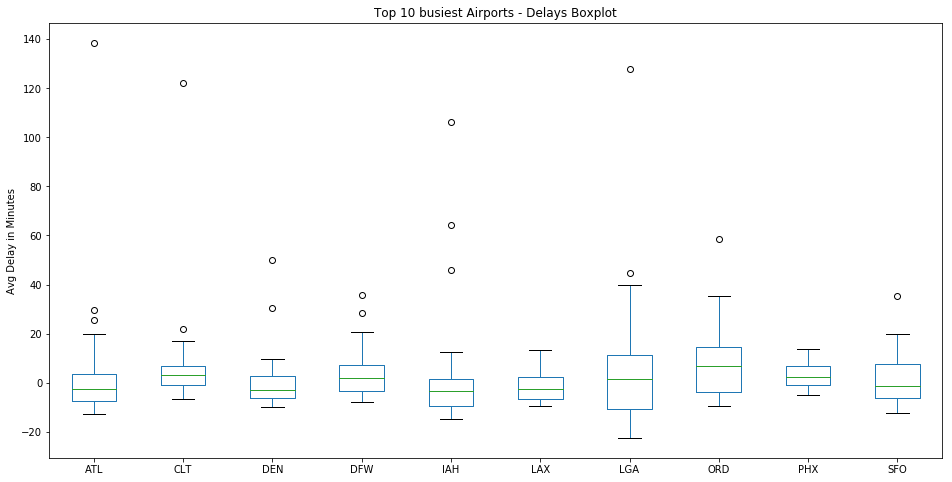

In [167]:
busiest_10_airports_pivots.plot(kind='box', figsize=[16,8])
plt.ylabel('Avg Delay in Minutes')
plt.title('Top 10 busiest Airports - Delays Boxplot')

We can see clear dispersion in data at Laguardia NYC and Ohare'Chicago. While other airports delays are evenly distributed around 0. Based on 2018 data we can say that try to avoid these airports during January.

Text(0.5, 1.0, 'Top 10 busiest Airports - Delays on Date')

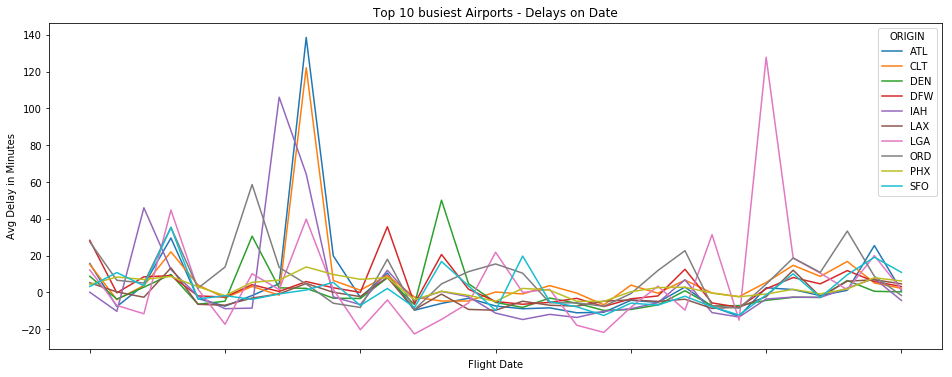

In [168]:
busiest_10_airports_pivots.plot(kind='line', figsize=[16,6])
plt.ylabel('Avg Delay in Minutes')
plt.xlabel('Flight Date')
plt.title('Top 10 busiest Airports - Delays on Date')

Clearly some days have spikes for most of the carriers suggesting weather related delays on those dates. Suggesting delays at one large airport has a chain reaction affect on other airport delays.